# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [18]:
import pandas as pd
import numpy as np
import scipy

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [8]:
temp.dtypes
#we got City and State as String and Temp as a Float

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [13]:
ny_state = temp[temp.State=='New York']
ny_state

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
scipy.mean(ny_state)

<ipython-input-17-ddf475ea418b>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(ny_state)


Temperature    10.740741
dtype: float64

In [19]:
np.mean(ny_state)

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [23]:
above_15 =temp[temp.Temperature>15][['City','State']]
above_15

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [24]:
city_above_15 =temp[temp.Temperature>15]['City']
city_above_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [26]:
city_between_15_20 =temp[(temp.Temperature>15)&(temp.Temperature<20)]['City']
city_between_15_20

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [27]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [30]:
employee.dtypes
#all strings except years and Salary(should be float)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [52]:
employee.head(9)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [34]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


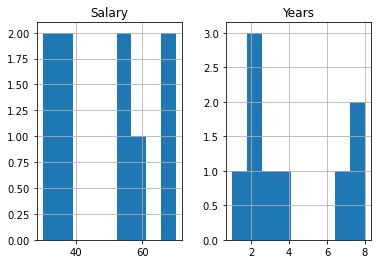

In [38]:
employee.hist(bins=9);

#### What's the average salary in this company?

In [42]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [43]:
employee.Salary.max()

70

#### What's the lowest salary?

In [44]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [48]:
employee[employee.Salary==employee.Salary.min()].Name

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [50]:
employee[employee.Name=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [51]:
employee[employee.Name=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [53]:
employee[employee.Title=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [54]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [57]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [58]:
employee[(employee.Salary>55)&(employee.Title == 'associate')]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [60]:
employee.groupby(['Years']).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [67]:
employee.groupby(['Title']).mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

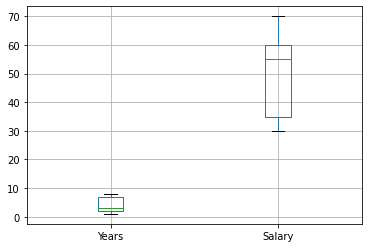

In [68]:
employee.boxplot();

In [70]:
# print first quartile here
employee.quantile(.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [71]:
# print third quartile here
employee.quantile(.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [72]:
employee.groupby(['Gender']).mean().Salary
#Male's is higher

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [73]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [81]:
employee.groupby(['Department']).max().Salary - employee.groupby(['Department']).min().Salary

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

In [93]:
employee.groupby(['Department'])['Salary'].agg(lambda salary: salary.max() - salary.min())

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [84]:
from zipfile import ZipFile
with ZipFile('Orders.zip', 'r') as zipObj:
   zipObj.extractall()

In [95]:
orders = pd.read_csv('Orders.csv', index_col=0)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [96]:
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [97]:
orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
#We have several entries , year month day hour are all ints but should be date
#Costumer Id should be string 

####  What is the average Purchase Price?

In [98]:
orders.amount_spent.mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [99]:
orders.amount_spent.max()

168469.6

In [100]:
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [104]:
orders[orders.Country=='Spain'].sample(10)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
407279,571851,22922,2011,10,3,13,fridge magnets us diner assorted,24,2011-10-19 13:02:00,0.85,12596,Spain,20.40
221143,556241,79144B,2011,6,4,16,painted lightbulb star+ moon,6,2011-06-09 16:04:00,0.42,12597,Spain,2.52
174968,551868,21914,2011,5,3,16,blue harmonica in box,36,2011-05-04 16:29:00,1.25,12540,Spain,45.00
277134,561093,22740,2011,7,1,10,polkadot pen,48,2011-07-25 10:01:00,0.85,12540,Spain,40.80
166274,550911,22839,2011,4,4,13,3 tier cake tin green and cream,1,2011-04-21 13:11:00,14.95,12354,Spain,14.95
229028,557007,22278,2011,6,4,11,overnight bag vintage rose paisley,7,2011-06-16 11:30:00,4.95,12484,Spain,34.65
73157,542303,21547,2011,1,4,11,ceramic birdhouse crested tit small,6,2011-01-27 11:05:00,2.95,12539,Spain,17.70
132836,547703,22329,2011,3,4,17,round container set of 5 retrospot,12,2011-03-24 17:10:00,1.65,12540,Spain,19.80
212276,555470,20725,2011,6,5,11,lunch bag red retrospot,10,2011-06-03 11:33:00,1.65,12455,Spain,16.50
50211,540550,84638,2011,1,1,9,small kitchen flower pots plaque,2,2011-01-10 09:11:00,6.95,12539,Spain,13.90


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [108]:
orders.Country.value_counts()['Spain']

2485

#### Select all the customers who have bought more than 50 items ?

In [127]:
total_items_bycostumer = orders.groupby(['CustomerID']).sum().Quantity
total_items_bycostumer[total_items_bycostumer>50]

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18278       66
18281       54
18282      103
18283     1397
18287     1586
Name: Quantity, Length: 4091, dtype: int64

#### Select orders from Spain that are above 50 items

In [131]:
orders[(orders.Country=='Spain')&(orders.Quantity>50)].sample(10)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
136771,547972,20728,2011,3,1,16,lunch bag cars blue,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50
282906,561669,23295,2011,7,4,17,set of 12 mini loaf baking cases,128,2011-07-28 17:09:00,0.72,12507,Spain,92.16
248800,558871,20728,2011,7,1,13,lunch bag cars blue,100,2011-07-04 13:19:00,1.45,12557,Spain,145.00
398639,571255,72802B,2011,10,5,17,ocean scent candle in jewelled box,200,2011-10-14 17:13:00,1.25,12454,Spain,250.00
248797,558871,22384,2011,7,1,13,lunch bag pink polkadot,100,2011-07-04 13:19:00,1.45,12557,Spain,145.00
495742,578321,84997C,2011,11,3,16,childrens cutlery polkadot blue,288,2011-11-23 16:59:00,3.75,12557,Spain,1080.00
52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
282910,561669,23293,2011,7,4,17,set of 12 fairy cake baking cases,128,2011-07-28 17:09:00,0.72,12507,Spain,92.16
248799,558871,20725,2011,7,1,13,lunch bag red retrospot,100,2011-07-04 13:19:00,1.45,12557,Spain,145.00


#### Select all free orders

In [134]:
orders[orders.amount_spent==0].sample(10)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
285657,561916,M,2011,8,1,11,manual,1,2011-08-01 11:44:00,0.0,15581,United Kingdom,0.0
436428,574138,23234,2011,11,4,11,biscuit tin vintage christmas,216,2011-11-03 11:26:00,0.0,12415,Australia,0.0
314748,564651,21786,2011,8,5,14,polkadot rain hat,144,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
420404,572893,21208,2011,10,3,14,pastel colour honeycomb fan,5,2011-10-26 14:36:00,0.0,18059,United Kingdom,0.0
361825,568384,M,2011,9,2,9,manual,1,2011-09-27 09:46:00,0.0,12748,United Kingdom,0.0
436597,574175,22065,2011,11,4,11,christmas pudding trinket pot,12,2011-11-03 11:47:00,0.0,14110,United Kingdom,0.0
314745,564651,23270,2011,8,5,14,set of 2 ceramic painted hearts,96,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
395529,571035,M,2011,10,4,12,manual,1,2011-10-13 12:50:00,0.0,12446,RSA,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [147]:
lunchbags=orders[orders.Description.str.contains('lunch bag')].sample(10)
lunchbags

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
435933,574077,23209,2011,11,3,15,lunch bag vintage doily,1,2011-11-02 15:56:00,1.65,17999,United Kingdom,1.65
199287,554093,23209,2011,5,7,12,lunch bag doiley pattern,10,2011-05-22 12:49:00,1.65,14837,United Kingdom,16.50
173406,551702,22662,2011,5,2,14,lunch bag dolly girl design,10,2011-05-03 14:16:00,1.65,13014,United Kingdom,16.50
493475,578233,20726,2011,11,3,12,lunch bag woodland,10,2011-11-23 12:20:00,1.65,14049,United Kingdom,16.50
479904,577228,22384,2011,11,5,12,lunch bag pink polkadot,1,2011-11-18 12:07:00,1.65,12391,Cyprus,1.65
260290,559807,22384,2011,7,2,14,lunch bag pink polkadot,1,2011-07-12 14:48:00,1.65,17841,United Kingdom,1.65
267719,560359,23209,2011,7,1,11,lunch bag doiley pattern,4,2011-07-18 11:47:00,1.65,14159,United Kingdom,6.60
295059,562770,20728,2011,8,2,11,lunch bag cars blue,10,2011-08-09 11:56:00,1.65,17139,United Kingdom,16.50
149908,549313,22382,2011,4,5,9,lunch bag spaceboy design,10,2011-04-08 09:45:00,1.65,12393,Australia,16.50
377864,569568,23206,2011,10,3,9,lunch bag apple design,10,2011-10-05 09:57:00,1.65,12700,France,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [150]:
lunchbags[lunchbags.year==2011].sample(5)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
295059,562770,20728,2011,8,2,11,lunch bag cars blue,10,2011-08-09 11:56:00,1.65,17139,United Kingdom,16.5
377864,569568,23206,2011,10,3,9,lunch bag apple design,10,2011-10-05 09:57:00,1.65,12700,France,16.5
267719,560359,23209,2011,7,1,11,lunch bag doiley pattern,4,2011-07-18 11:47:00,1.65,14159,United Kingdom,6.6
493475,578233,20726,2011,11,3,12,lunch bag woodland,10,2011-11-23 12:20:00,1.65,14049,United Kingdom,16.5
149908,549313,22382,2011,4,5,9,lunch bag spaceboy design,10,2011-04-08 09:45:00,1.65,12393,Australia,16.5


#### Show the frequency distribution of the amount spent in Spain.

(16.875, 20.25]      471
(13.5, 16.875]       441
(10.125, 13.5]       345
(6.75, 10.125]       234
(3.375, 6.75]        231
                    ... 
(816.75, 820.125]      0
(820.125, 823.5]       0
(823.5, 826.875]       0
(826.875, 830.25]      0
(671.625, 675.0]       0
Name: amount_spent, Length: 400, dtype: int64

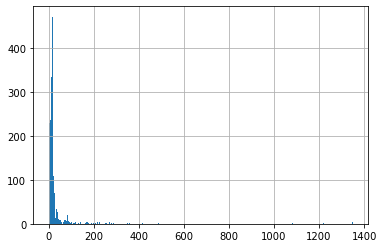

In [158]:
orders[orders.Country=='Spain'].amount_spent.hist(bins=400);
orders[orders.Country=='Spain'].amount_spent.value_counts(bins=400)

#### Select all orders made in the month of August

In [152]:
orders[orders.month== 8].sample(5)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
313616,564526,22438,2011,8,4,14,balloon art make your own flowers,10,2011-08-25 14:50:00,1.95,15805,United Kingdom,19.5
293284,562593,85049E,2011,8,7,15,scandinavian reds ribbons,2,2011-08-07 15:43:00,1.25,16549,United Kingdom,2.5
311460,564301,22554,2011,8,3,11,plasters in tin woodland animals,12,2011-08-24 11:54:00,1.65,14299,United Kingdom,19.8
313126,564437,22327,2011,8,4,12,round snack boxes set of 4 skulls,6,2011-08-25 12:10:00,2.95,13320,United Kingdom,17.7
310047,564162,22637,2011,8,2,13,piggy bank retrospot,4,2011-08-23 13:27:00,2.55,13481,United Kingdom,10.2


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [169]:
orders[orders.month==8].groupby(['Country']).count().InvoiceNo

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country

In [170]:
orders.groupby(['Country']).amount_spent.mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [175]:
m = orders.UnitPrice.max()
orders[orders['UnitPrice'] == m]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [177]:
orders.groupby(['year']).amount_spent.mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64